## Predicting the prices of Avacados

**About the data - **

The dataset represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

1. Date         : the date of observation
2. AveragePrice : the average price of a single avocado
3. Total Volume : Total number of avocados sold
4. Total Bags   :  Total number  o bags
5. Small Bags   :  Total number of Small bags
6. Large Bags   :  Total number of Large bags
7. Xlarge Bags  :  Total number of XLarge bags
8. type         :  Conventional or organic
9. year         :  The year
10. region      : the city or region of the observation
11. 4046        : Total number of avocados with PLU 4046 sold
12. 4225        : Total number of avocados with PLU 4225 sold
13. 4770        : Total number of avocados with PLU 4770 sold

In [1]:
from IPython.display import Image

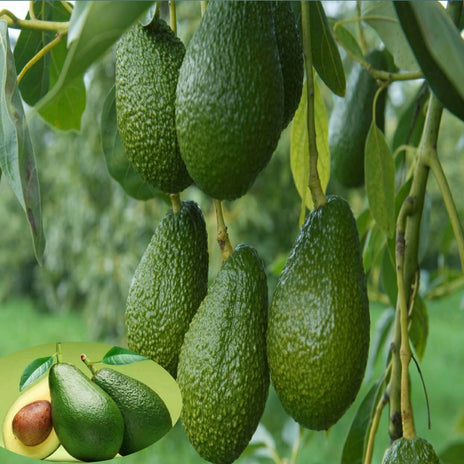

In [2]:
# display image using python
url = 'https://plantskingdom.in/cdn/shop/products/WhatsAppImage2020-11-11at9.23.29AM_464x464.jpg'

Image(url,height=300,width=400)

In [3]:
#pip install matplotlib


In [4]:
#pip install seaborn

In [5]:
#pip install xgboost

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv(r"E:\Prakash Senapati\Excel_data\M.L. Project\resume_projects 4 link 1st feb\avocado.csv")

In [8]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [10]:
df = df.drop(['Unnamed: 0'], axis = 1)
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


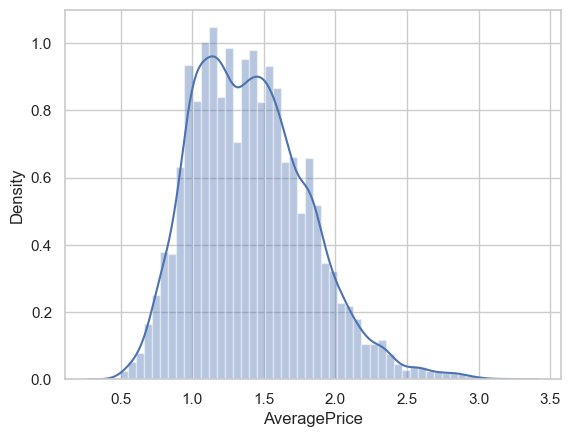

In [11]:
sns.distplot(df['AveragePrice'],);

<Axes: xlabel='year', ylabel='count'>

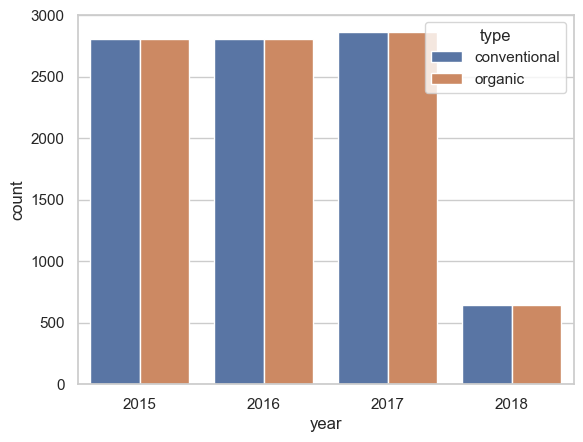

In [12]:
sns.countplot(data=df, x='year', hue='type')

In [13]:
df.year.value_counts()

year
2017    5722
2016    5616
2015    5615
2018    1296
Name: count, dtype: int64

<Axes: xlabel='type', ylabel='AveragePrice'>

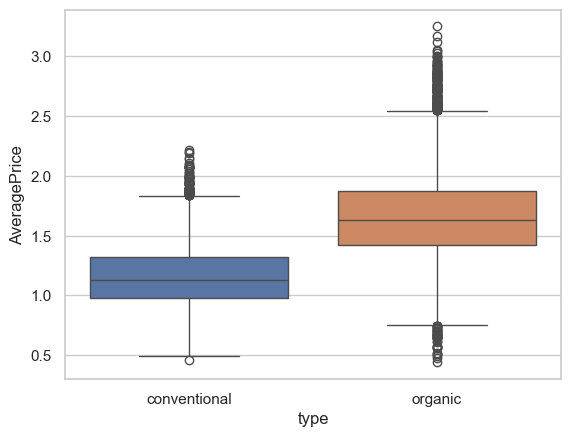

In [14]:
sns.boxplot(data = df, x = 'type',y='AveragePrice', hue= 'type')

<Axes: xlabel='year', ylabel='AveragePrice'>

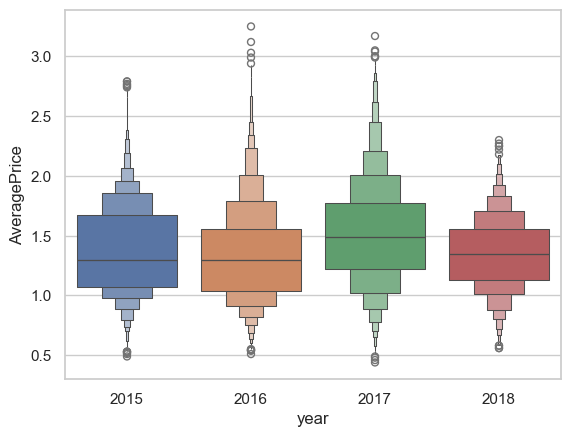

In [15]:
df.year = df.year.apply(str)
sns.boxenplot(data=df, x="year", y="AveragePrice", hue = "year")

### Dealing with categorical features.

In [16]:
df['type'] = df['type'].map({'conventional':0, 'organic':1})

# Extracting month from date column.
df.Date = df.Date.apply(pd.to_datetime)
df['Month']=df['Date'].apply(lambda x:x.month)
df.drop('Date',axis=1, inplace=True)
df.Month = df.Month.map({1:'JAN',2:'FEB',3:'MARCH',
                         4:'APRIL',5:'MAY',6:'JUNE',7:'JULY',8:'AUG',
                         9:'SEPT',10:'OCT',11:'NOV',12:'DEC'})

In [17]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,Albany,DEC
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,Albany,DEC
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,Albany,DEC
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,Albany,DEC
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,Albany,NOV


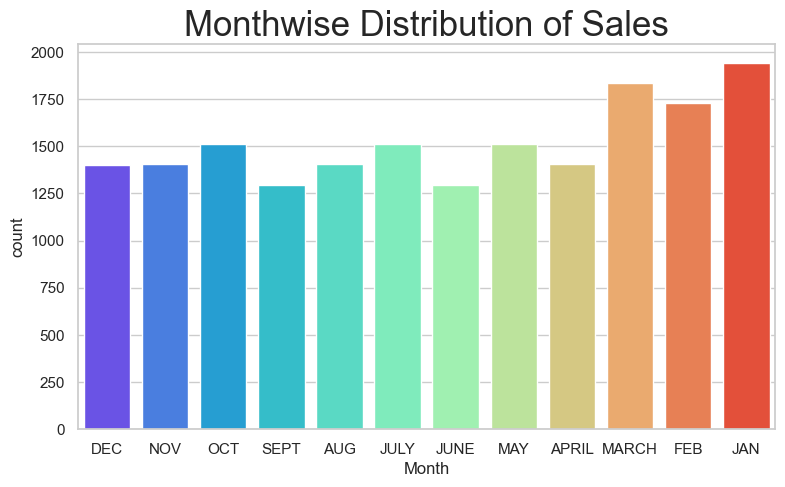

In [18]:
plt.figure(figsize=(9,5))
sns.countplot(data=df, x='Month', palette= "rainbow")
plt.title("Monthwise Distribution of Sales",fontdict={'fontsize':25});

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  int64  
 10  year          18249 non-null  object 
 11  region        18249 non-null  object 
 12  Month         18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


### Preparing data for ML models

In [20]:
# Creating dummy variables

dummies = pd.get_dummies(df[['year','region','Month']],drop_first=True)
#(drop_first=True) :helps in reducing the extra column created during dummy variable creation.

df_dummies = pd.concat([df[['Total Volume', '4046', '4225','4770', 'Total Bags',
                            'Small Bags', 'Large Bags', 'XLarge Bags', 'type']],dummies],axis=1)
target = df['AveragePrice']

In [21]:
# Splitting data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_dummies, target, test_size = 0.30, random_state = 0)

In [22]:
X_train.shape

(12774, 76)

In [23]:
y_train.shape

(12774,)

In [24]:
# Standardizing the data 
cols_to_std = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags','Large Bags', 'XLarge Bags']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train[cols_to_std])
X_train = scaler.transform(X_train[cols_to_std])
X_test = scaler.transform(X_test[cols_to_std])

In [25]:
# importing ML models from scikit-learn

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [26]:
# TO save time all models can be applied once using for loop

regressors = {
    'Linear Regression' : LinearRegression(),
    'Support Vector Machines' : SVR(gamma=1),
    'K-nearest Neighbors' : KNeighborsRegressor(n_neighbors=1),
    'Decision Tree' : DecisionTreeRegressor(),
    'Random Forest' : RandomForestRegressor(),
    'XGBoost' : XGBRegressor()
}

results=pd.DataFrame(columns=['MAE','MSE','R2-score'])
for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    
    results.loc[method] = [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.round(r2_score(y_test,pred),3)]
    

In [27]:
print(results)

                           MAE    MSE  R2-score
Linear Regression        0.314  0.154     0.048
Support Vector Machines  0.226  0.091     0.434
K-nearest Neighbors      0.173  0.074     0.540
Decision Tree            0.192  0.084     0.479
Random Forest            0.140  0.040     0.749
XGBoost                  0.157  0.048     0.705


In [28]:
X_train.shape

(12774, 8)

In [29]:
y_train.shape

(12774,)

## Deep Neural Network

In [30]:
# Splitting train set into training and validation sets.
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, test_size = 0.20, random_state = 0)

#importing tensorflow libraries 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [31]:
(X_train1.shape,y_train1.shape)

((10219, 8), (10219,))

In [32]:
(X_val.shape, y_val.shape)

((2555, 8), (2555,))

In [33]:
# Creating model
model = Sequential()
# Adding : first input layer
model.add(Dense(76,activation= 'relu', kernel_initializer = tf.random_uniform_initializer(minval= -0.1, maxval= 0.1),
                bias_initializer= tf.random_uniform_initializer(minval = -0.1, maxval= 0.1)))
#Adding : 1st hidden layer
model.add(Dense(200, activation = 'relu', kernel_initializer = tf.random_uniform_initializer(minval= -0.1, maxval= 0.1),
                bias_initializer= tf.random_uniform_initializer(minval= -0.1, maxval = 0.1)))
# Add : drop
model.add(Dropout(0.5))
# Adding : 2nd hidden layer
model.add(Dense(200,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
# Add : drop
model.add(Dropout(0.5))
# Adding : 3rd hidden layer
model.add(Dense(200,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
# Add : drop
model.add(Dropout(0.5))
model.add(Dense(1))

# Adding : Output layer
model.compile(optimizer='Adam', loss= 'mean_squared_error')
early_stop = EarlyStopping(monitor= 'val_loss', mode = 'min', verbose = 0, patience= 10)

In [34]:
# fitting MOdel

model.fit(x=X_train1,y=y_train1,
          validation_data=(X_val,y_val),
          batch_size=100,epochs=150,callbacks=[early_stop])

Epoch 1/150
103/103 [==============================] - 5s 17ms/step - loss: 0.3258 - val_loss: 0.1157
Epoch 2/150
103/103 [==============================] - 1s 13ms/step - loss: 0.1653 - val_loss: 0.1158
Epoch 3/150
103/103 [==============================] - 1s 11ms/step - loss: 0.1471 - val_loss: 0.0967
Epoch 4/150
103/103 [==============================] - 1s 12ms/step - loss: 0.1368 - val_loss: 0.0967
Epoch 5/150
103/103 [==============================] - 1s 12ms/step - loss: 0.1324 - val_loss: 0.1013
Epoch 6/150
103/103 [==============================] - 1s 12ms/step - loss: 0.1311 - val_loss: 0.0941
Epoch 7/150
103/103 [==============================] - 1s 12ms/step - loss: 0.1250 - val_loss: 0.0885
Epoch 8/150
103/103 [==============================] - 1s 12ms/step - loss: 0.1251 - val_loss: 0.0944
Epoch 9/150
103/103 [==============================] - 1s 11ms/step - loss: 0.1202 - val_loss: 0.0881
Epoch 10/150
103/103 [==============================] - 1s 12ms/step - loss: 0.120

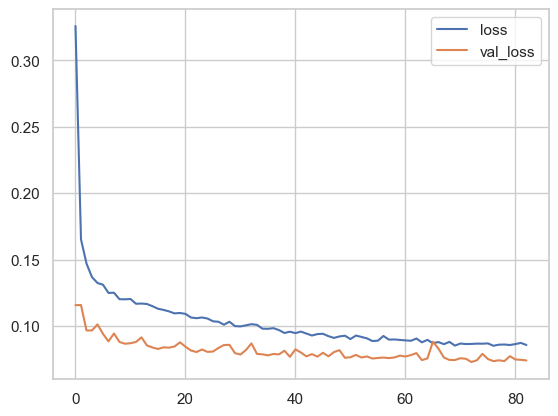

In [35]:
losses = pd.DataFrame(model.history.history)
losses[['loss', 'val_loss']].plot();

In [36]:
dnn_pred = model.predict(X_test)

172/172 [==============================] - 1s 4ms/step


## Result table

In [37]:
results.loc['Deep Neural Network'] = [mean_absolute_error(y_test, dnn_pred).round(3),
                                     mean_squared_error(y_test, dnn_pred).round(3),
                                     r2_score(y_test,dnn_pred).round(3)]
results

,MAE,MSE,R2-score
Linear Regression,0.314,0.154,0.048
Support Vector Machines,0.226,0.091,0.434
K-nearest Neighbors,0.173,0.074,0.540
Decision Tree,0.192,0.084,0.479
Random Forest,0.140,0.040,0.749
XGBoost,0.157,0.048,0.705
Deep Neural Network,0.214,0.081,0.499


In [38]:
f"10% of mean of target variable is {np.round(0.1 * df.AveragePrice.mean(),3)}"

'10% of mean of target variable is 0.141'

In [39]:
results.sort_values('R2-score',ascending=False).style.background_gradient(cmap='Greens',subset=['R2-score'])

,MAE,MSE,R2-score
Random Forest,0.140000,0.040000,0.749000
XGBoost,0.157000,0.048000,0.705000
K-nearest Neighbors,0.173000,0.074000,0.540000
Deep Neural Network,0.214000,0.081000,0.499000
Decision Tree,0.192000,0.084000,0.479000
Support Vector Machines,0.226000,0.091000,0.434000
Linear Regression,0.314000,0.154000,0.048000


# Conclusion:
* All  models have mean absolute error , more than 10% of mean of target variable.


* For this dataset, Random Forest and  XGBoost algorithms have shown best results(but i am not satisfied with this accuracy(R2-score), the score must between the 0.89 to 0.85 for top 5 algorithms.

In [40]:
print("Task Done")

Task Done
